# Análisis Exploratorio de Datos (EDA) - Yelp Dataset

## Introducción
Este documento presenta un Análisis Exploratorio de Datos (EDA) aplicado al conjunto de datos de Yelp. El objetivo principal es mejorar la comprensión de la información contenida en los archivos Parquet relacionados con negocios (business), consejos (tip), usuarios (user), y reseñas de la plataforma Yelp.

## Objetivos del EDA

* Top 10 Usuarios y Ciudades: Identificar los 10 usuarios y ciudades más activos basándonos en el número de reseñas y la presencia de bancos.

* Análisis Temporal: Evaluar la evolución de la incorporación de nuevos usuarios a lo largo del tiempo, analizando la variable 'yelping_since'.

* Relaciones Sociales: Investigar las relaciones sociales de los usuarios a través de la información en la columna 'friends' y analizar la cantidad de amigos y su distribución.

* Nube de Palabras: Crear una nube de palabras a partir de los comentarios ('text') en los tips para visualizar términos frecuentes y destacados.

* Distribución de Review Count y Average Stars: Visualizar la distribución de la cantidad de reseñas y las calificaciones promedio de los usuarios.

* Análisis Temporal: Analiza la distribución de usuarios activos en Yelp a lo largo del tiempo, específicamente por año.

* Análisis de Relaciones Sociales de los usuarios: Utilizando la información en la columna 'friends'. Analiza la cantidad de amigos y cómo se distribuyen.

* Distribución de Estrellas: Presenta un histograma que muestra la frecuencia de las diferentes clasificaciones de estrellas (1 a 5), proporcionando información sobre la distribución de opiniones generales.

* Tendencias Temporales: El gráfico muestra la tendencia temporal del número de reseñas por mes para el período comprendido entre 2007 y 2021.

* Correlación entre Estrellas y Variables Adicionales: Calcula la correlación entre la calificación de estrellas y otras variables como 'useful', 'funny', o 'cool'. Explora si hay alguna relación entre la calificación de estrellas y la utilidad, humor, o frescura percibida de una reseña.

* Distribución Horaria:
Analizar la distribución de actividades a lo largo del día utilizaremos un gráfico de barras para mostrar las horas del día con mayor actividad.

## Argumentación
Encabezado y Comentarios
Se utiliza un encabezado para cada sección que indica el propósito o la acción realizada. Los comentarios explican el propósito y la lógica detrás de cada línea de código, facilitando la comprensión del código a otros desarrolladores.


In [58]:
#Importar bibliotecas necesarias
import pandas as pd
import os

# EDA "business.csv"
Exploración de Datos de Negocios

Se carga un conjunto de datos de negocios y se identifican los 10 usuarios con más reseñas.
Se visualizan estos usuarios a través de un gráfico de barras para resaltar los usuarios más activos.

In [59]:
#Obtener la ruta del archivo
file_path = '../data/Cloud Upload/Yelp/business/business.csv'


In [60]:
# Lee el archivo Parquet en un DataFrame
df = pd.read_csv(file_path)
df.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,7PDi_iyik3jraDAzWwwR4Q,Chase JP Morgan Bank Credit Card Services,NaN,Wilmington,FL,19850,39.749361,-75.643331,1.5,111,1,"Banks & Credit Unions, Financial Services"
1,FC6ef4rMMZKNov_-A9M6iQ,TD Bank Havertown,120 W Eagle Rd,Haverford,LA,19083,39.985661,-75.314844,1.5,6,1,"Banks & Credit Unions, Financial Services"
2,0QmgzzPVNHeNL76B8rwTKA,Beneficial Bank,1600 Chestnut St,Philadelphia,LA,19103,39.951154,-75.167335,2.5,5,0,"Banks & Credit Unions, Financial Services"
3,ZNfaufwJ0iug9Qz_mTluMw,Chase Bank,2001 N Dale Mabry Hwy,Tampa,PA,33607,27.959651,-82.505057,2.5,11,1,"Banks & Credit Unions, Financial Services"
4,PcDeBAT95JXyTBFeFvK7oA,Bank of America Financial Center,21725 Village Lakes Shopping Ctr Dr,Land O Lakes,IN,34639,28.189369,-82.457027,1.5,6,1,"Financial Services, Banks & Credit Unions"


In [61]:

# Importa las bibliotecas necesarias
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [62]:
# 10 usuarios con más reseñas
# Calcula la cantidad de reseñas por usuario y obtén los 10 usuarios con más reseñas
name_counts = df['name'].value_counts()
top_users = name_counts.head(10)

# Muestra los 10 usuarios con más reseñas
print("Top 10 Usuarios que Más se Repiten:")
print(top_users)


Top 10 Usuarios que Más se Repiten:
name
Bank of America Financial Center    94
Wells Fargo Bank                    74
Chase Bank                          72
TD Bank                             27
U.S. Bank Branch                    22
PNC Bank                            20
Suncoast Credit Union               15
Commerce Bank                       10
GTE Financial                       10
Navy Federal Credit Union            9
Name: count, dtype: int64


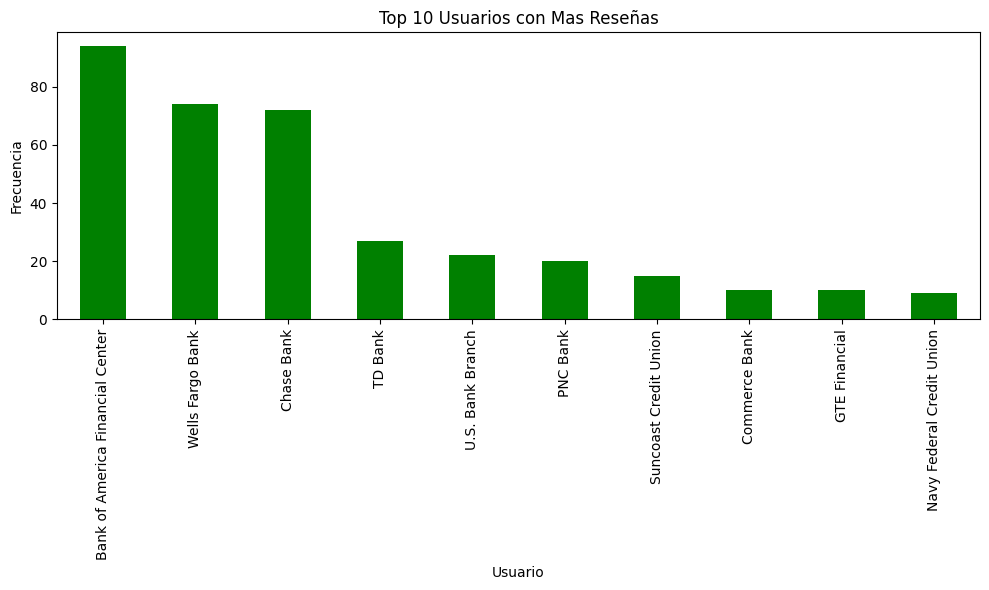

In [63]:
# Crea un gráfico de barras para visualizar los 10 usuarios con más reseñas
plt.figure(figsize=(10, 6))
top_users.plot(kind='bar', color='green')
plt.xlabel('Usuario')
plt.ylabel('Frecuencia')
plt.title('Top 10 Usuarios con Mas Reseñas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

    El gráfico muestra los 10 bancos de EE. UU. con más reseñas. El banco con más reseñas es Bank of America Financial Center y el banco  menores reseñas es Navy Federal Credit Union



## Análisis de Ciudades:

Se analiza la distribución de la cantidad de bancos por ciudad y se visualiza a través de un gráfico de barras.

In [64]:
# Contar la cantidad de bancos por ciudad
city_counts = df['city'].value_counts()

# Imprimir la cantidad de bancos por ciudad
for city, count in city_counts.items():
    print(f"Ciudad: {city} - Cantidad de bancos: {count}")


Ciudad: Tucson - Cantidad de bancos: 79
Ciudad: Philadelphia - Cantidad de bancos: 73
Ciudad: Reno - Cantidad de bancos: 64
Ciudad: Tampa - Cantidad de bancos: 54
Ciudad: Nashville - Cantidad de bancos: 45
Ciudad: New Orleans - Cantidad de bancos: 27
Ciudad: Sparks - Cantidad de bancos: 24
Ciudad: Santa Barbara - Cantidad de bancos: 22
Ciudad: Saint Louis - Cantidad de bancos: 20
Ciudad: Indianapolis - Cantidad de bancos: 18
Ciudad: Wilmington - Cantidad de bancos: 15
Ciudad: Clearwater - Cantidad de bancos: 14
Ciudad: Boise - Cantidad de bancos: 12
Ciudad: Edmonton - Cantidad de bancos: 11
Ciudad: Goleta - Cantidad de bancos: 11
Ciudad: Meridian - Cantidad de bancos: 10
Ciudad: Cherry Hill - Cantidad de bancos: 10
Ciudad: Riverview - Cantidad de bancos: 9
Ciudad: Saint Petersburg - Cantidad de bancos: 9
Ciudad: St. Louis - Cantidad de bancos: 7
Ciudad: Metairie - Cantidad de bancos: 7
Ciudad: Brandon - Cantidad de bancos: 6
Ciudad: Carmel - Cantidad de bancos: 5
Ciudad: Fishers - Cant

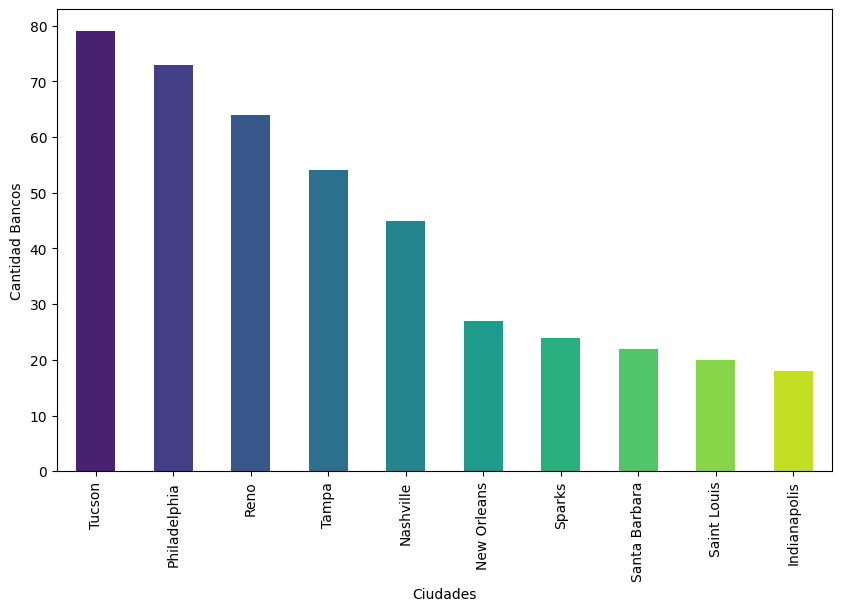

In [65]:
#Contar la cantidad de bancos por ciudad
city_counts = df['city'].value_counts()

# Selecciona las 10 ciudades principales
top_cities = city_counts.head(10)

# Define una paleta de colores verde utilizando Seaborn
green_palette = sns.color_palette("viridis", len(top_cities))

# Crea el gráfico de barras utilizando la paleta de colores verde
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color=green_palette)
plt.xlabel('Ciudades')
plt.ylabel('Cantidad Bancos')
plt.show()

    La ciudad con la mayor cantidad de bancos es Tucsoncon con 79 bancos, seguida de  Philadelphia con 73 bancos, Reno con 64 bancos y a partir de  NNew Orleans con las otras ciudades tienen menos de 30 bancos cada una

# EDA "tip.csv"
## Análisis de Tips:

Se cargan datos de tips y se determina el rango temporal de las fechas.
Se crea una nube de palabras para visualizar términos frecuentes en la columna de texto.


In [66]:
#Obtener la ruta del archivo
file_path = '../data/Cloud Upload/Yelp/tip/tip.csv'

# Lee el archivo Parquet en un DataFrame
df_tips = pd.read_csv(file_path)
df_tips.head(3)

,user_id,business_id,text,date,compliment_count,hour,time
0,uIKD7cJF4ZWkicin2ulWPg,iUbEzrvaq74ET-SAEayRzw,Even the drive through effing sucks,2013-12-19,0,15,15:35:14
1,lAW03ccfMEuRZiDqvVgc0w,pkz0ctu2Nccjznsx_ihr7Q,Visa Debit is here!,2014-09-03,0,21,21:22:35
2,rb1gCIyinPQss5Smnfgr2A,6eKWeZJAuO6CDtH2SCXNDA,Don't ask the staff at Jefferson Hospital abou...,2014-06-09,0,7,07:40:29


In [67]:
#Rango temporal de los datos
min_date = df_tips['date'].min()
max_date = df_tips['date'].max()

print("Fecha mínima:", min_date)
print("Fecha máxima:", max_date)

Fecha mínima: 2010-02-12
Fecha máxima: 2021-12-23


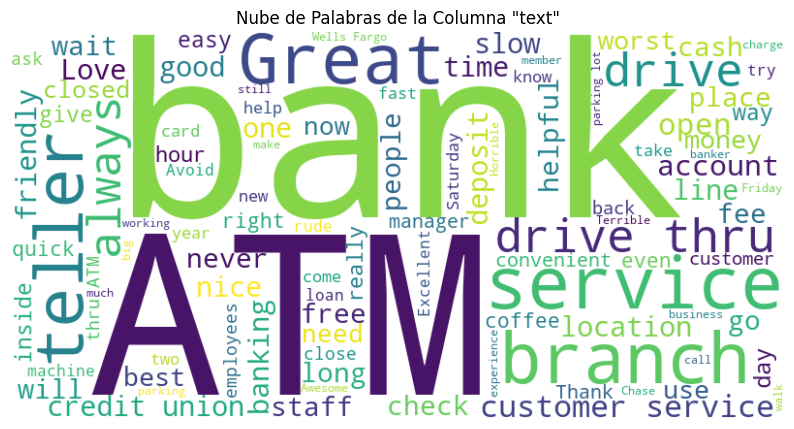

In [68]:


# Concatena todos los textos de la columna 'text' en una sola cadena
all_text = ' '.join(df_tips['text'])

# Crea un objeto WordCloud con las configuraciones deseadas
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_text)

# Configura la figura para mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de la Columna "text"')
plt.show()

    Las palabras más frecuentes se muestran en letras más grandes y las menos frecuentes en letras más pequeñas.

Top 10 Usuarios que Más se Repiten:
user_id
I2XpWCHAom1JRyHXZQrnfg    12
AaJ9d4OrFmgc4S_U2QiSZg    12
Ase_kJIYuT6yOsqqVPuWUA    10
xWmYN57XXZbg0LOK8WbbFQ     9
LH5bM22W-xsRdMQxaaEIYg     7
e67fm29pOiQUcPSltCAHVA     7
bDCCzWxv2fU-z7eeaFzKxQ     6
O1_mLC0sVAS2RqsfPZTiXg     5
5Y5KbsI5buMcNh2hTFaRpA     5
wYAWav_X7X0AAEsZZJvrsQ     5
Name: count, dtype: int64


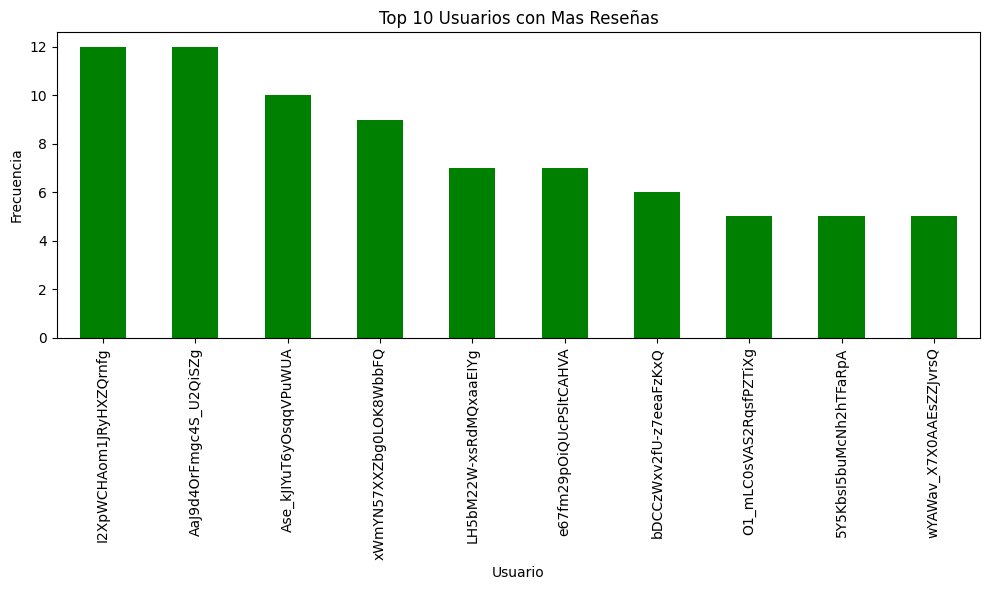

In [69]:
user_id_counts = df_tips['user_id'].value_counts()

top_users = user_id_counts.head(10)

print("Top 10 Usuarios que Más se Repiten:")
print(top_users)

plt.figure(figsize=(10, 6))
top_users.plot(kind='bar', color='green')
plt.xlabel('Usuario')
plt.ylabel('Frecuencia')
plt.title('Top 10 Usuarios con Mas Reseñas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# EDA "user.csv"
## Análisis de Usuarios:

Se exploran las distribuciones de review_count y average_stars mediante histogramas.

Se realiza un análisis temporal de la incorporación de nuevos usuarios a lo largo de los años.

Se investiga la distribución de la cantidad de amigos a través de un histograma.

In [70]:
#Obtener la ruta del archivo
file_path = '../data/Cloud Upload/Yelp/user/user.csv'

# Lee el archivo Parquet en un DataFrame
df_user = pd.read_csv(file_path)
df_user.head(3)

,user_id,name,review_count,yelping_since,useful,funny,cool,friends,fans,average_stars,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,IpLRJY4CP3fXtlEd8Y4GFQ,Robyn,518,2009-04-11,1325,450,348,"hdwDo7CLh9aN_9PckAos4Q, ci-mepWGgsgGT3sFI2mhMg...",35,2.95,...,4,2,7,1,35,17,20,20,20,6
1,2l0O1EI1m0yWjFo2zSt71w,Shiho,2837,2005-07-02,19237,9542,15235,"ZxigNlfaGmqtC1CROVu9Dg, XKAFikZAfddYv0Vg1PUkwA...",492,3.92,...,108,85,79,40,350,742,1070,1070,403,258
2,RgDVC3ZUBqpEe6Y1kPhIpw,Monica,1282,2009-02-23,12640,10005,11149,"sHozd2pcOKwHtPr8VlZJfg, 7mL9cvICl8fuCQTM89a-SA...",804,4.17,...,102,108,138,65,898,2584,1731,1731,551,177


## Exploración de la Distribución de Review Count y Average Stars:

Visualiza la distribución de review_count y average_stars para entender la cantidad de reseñas y la calificación promedio de los usuarios.

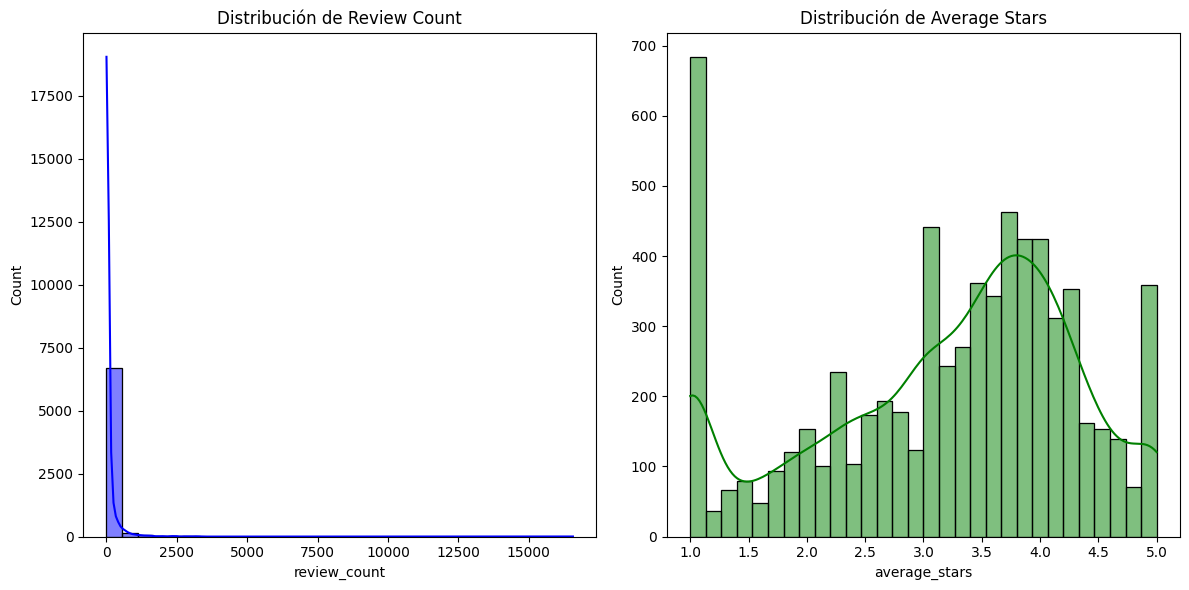

In [71]:
# Exploración de la Distribución de Review Count y Average Stars
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_user['review_count'], bins=30, kde=True, color='blue')
plt.title('Distribución de Review Count')

plt.subplot(1, 2, 2)
sns.histplot(df_user['average_stars'], bins=30, kde=True, color='green')
plt.title('Distribución de Average Stars')

plt.tight_layout()
plt.show()

## Análisis Temporal:

Analiza la distribución de usuarios activos en Yelp a lo largo del tiempo, específicamente por año

C:\Users\Admin\AppData\Local\Temp\ipykernel_134380\3514512616.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='yelping_year', data=df_user, palette='viridis')


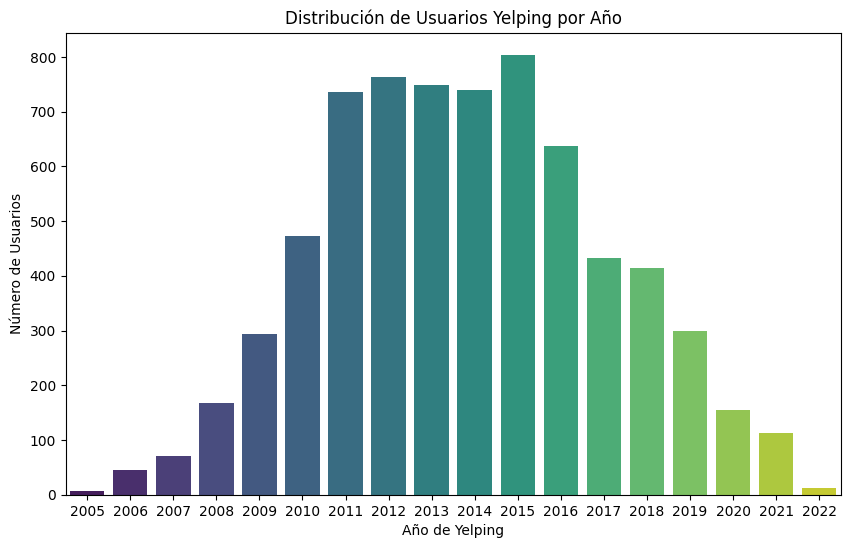

In [72]:
# Análisis Temporal
df_user['yelping_since'] = pd.to_datetime(df_user['yelping_since'])
df_user['yelping_year'] = df_user['yelping_since'].dt.year

plt.figure(figsize=(10, 6))
sns.countplot(x='yelping_year', data=df_user, palette='viridis')
plt.title('Distribución de Usuarios Yelping por Año')
plt.xlabel('Año de Yelping')
plt.ylabel('Número de Usuarios')
plt.show()

    El año más activo fue el 2015 con un cantidad de usuarios de 804

## Análisis de Relaciones Sociales:

Investiga las relaciones sociales de los usuarios utilizando la información en la columna friends. Analiza la cantidad de amigos y cómo se distribuyen.

In [73]:
df_user.isna().any()

user_id               False
name                  False
review_count          False
yelping_since         False
useful                False
funny                 False
cool                  False
friends                True
fans                  False
average_stars         False
compliment_hot        False
compliment_more       False
compliment_profile    False
compliment_cute       False
compliment_list       False
compliment_note       False
compliment_plain      False
compliment_cool       False
compliment_funny      False
compliment_writer     False
compliment_photos     False
yelping_year          False
dtype: bool

In [74]:
df_user['friends']

0       hdwDo7CLh9aN_9PckAos4Q, ci-mepWGgsgGT3sFI2mhMg...
1       ZxigNlfaGmqtC1CROVu9Dg, XKAFikZAfddYv0Vg1PUkwA...
2       sHozd2pcOKwHtPr8VlZJfg, 7mL9cvICl8fuCQTM89a-SA...
3       kN4A5jI8pzSmo6q-gAto1A, HtCPdVujYJAZF4FKr-C9Lg...
4       K8h4ypoVZAnmhC2dHKsDrQ, 7nS_R5h4YiZjgH532k_8gA...
                              ...                        
6905                                                  NaN
6906                                                  NaN
6907                                                  NaN
6908                                                  NaN
6909                                                  NaN
Name: friends, Length: 6910, dtype: object

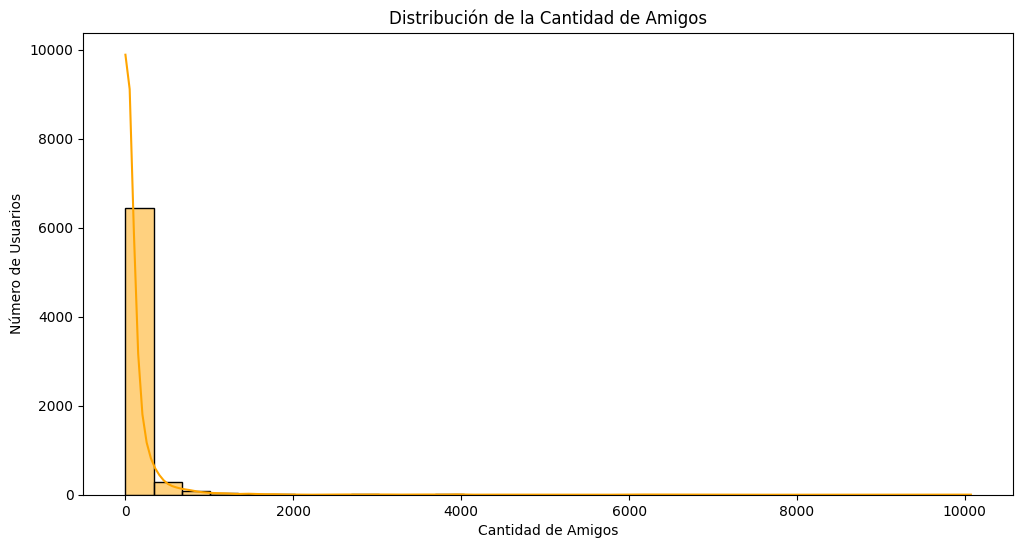

In [75]:
# Calcular la cantidad de amigos
df_user['friends_count'] = df_user['friends'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

# Visualizar la distribución de la cantidad de amigos
plt.figure(figsize=(12, 6))
sns.histplot(df_user['friends_count'], bins=30, kde=True, color='orange')
plt.title('Distribución de la Cantidad de Amigos')
plt.xlabel('Cantidad de Amigos')
plt.ylabel('Número de Usuarios')
plt.show()

    La mayoría de los usuarios de Yelp tienen pocos amigos

# EDA  "checkin.csv"

In [76]:

#Obtener la ruta del archivo
file_path = '../data/Cloud Upload/Yelp/checkin/checkin.csv'

# Lee el archivo Parquet en un DataFrame
df_checkin = pd.read_csv(file_path)
df_checkin.head(3)

,business_id,date,hour,time
0,-4I0u12gYWIToYmdeyxpeQ,2010-07-08,12,12:43:09
1,-4I0u12gYWIToYmdeyxpeQ,2010-08-11,11,11:58:20
2,-4I0u12gYWIToYmdeyxpeQ,2010-08-25,16,16:54:51


## Distribución Horaria:
Analizar la distribución de actividades a lo largo del día utilizaremos un gráfico de barras para mostrar las horas del día con mayor actividad.

C:\Users\Admin\AppData\Local\Temp\ipykernel_134380\2052909030.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df_checkin, palette='viridis')


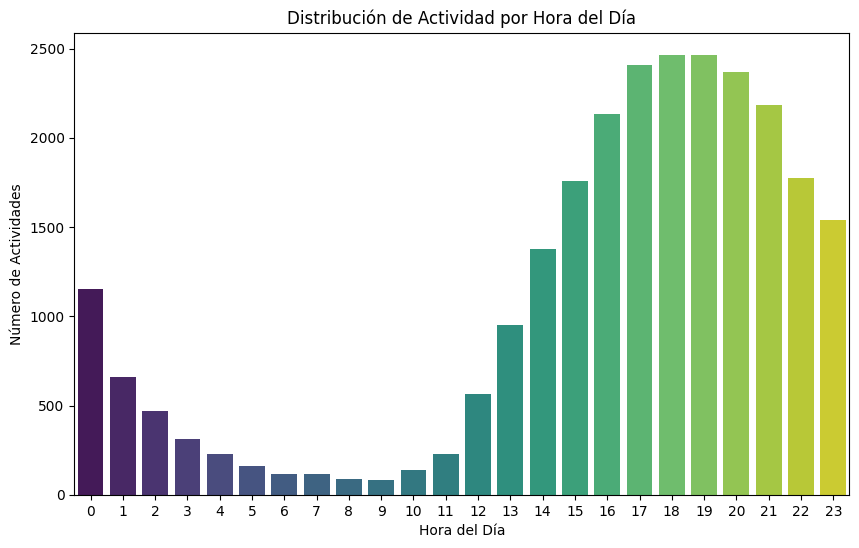

In [77]:

# Distribución Horaria
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df_checkin, palette='viridis')
plt.title('Distribución de Actividad por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Actividades')
plt.show()


    Check-ins por Hora del Día:

    La hora con el mayor número de check-ins es a las 17 hrs, con 2407 actividades, seguida por las 19 hrs  con 2466.
    Se observa un mínimo de actividad entre a las 8 hrs con 87 actividades y 9 hrs con 84 actividades check-ins.
    
    Estos datos sugieren oportunidades para estrategias de marketing focalizadas y la optimización de operaciones durante las horas pico.



## EDA "review.csv"

In [78]:
#Obtener la ruta del archivo
file_path = '../data/Cloud Upload/Yelp/review/review.csv'

# Lee el archivo Parquet en un DataFrame
df_review = pd.read_csv(file_path)
df_review.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,hour,time
0,OiiUQHpUPSIw592zKebnTg,Wshkpj8aHWuzIeca1QxWTA,R-HCwu9UbasUudG1yTM1Ow,1,13,19,6,I am positively LIVID.\n\nI went to check my a...,2009-10-15,0,00:08:18
1,qHU0E4AMN9kTGAgfVZQSGQ,JjX-bYG0O5B21fklcZhmog,PGDRRyplRKHAixBZSBLseA,5,0,0,0,"My business, my parents, my ex-husband, my son...",2017-10-24,21,21:01:03
2,OaYClWZ3UyrAWo60tGCVsg,duKhEm4zoR5G2nllvoxqgQ,ggJXlslLYndvE7n3hgJBCQ,4,3,3,0,I was walking on Delaware Ave looking for an A...,2009-05-23,12,12:02:01


In [79]:
# Obtener la fecha mínima y máxima de la columna date
fecha_min = df_review["date"].min()
fecha_max = df_review["date"].max()

# Mostrar el resultado
print(f"El rango de fechas de las reviews es desde {fecha_min} hasta {fecha_max}")

El rango de fechas de las reviews es desde 2006-03-11 hasta 2022-01-19



## Distribución de Estrellas:

Un histograma que muestre la frecuencia de las diferentes clasificaciones de estrellas (1 a 5). Esto nos ayudará a entender cómo se distribuyen las opiniones generales.

In [80]:
# Calcular la distribución de estrellas en porcentajes
stars_distribution = df_review['stars'].value_counts(normalize=True).sort_index()

# Imprimir los porcentajes
for star, percentage in stars_distribution.items():
    print(f'Estrella {star}: {percentage * 100:.2f}%')

Estrella 1: 50.48%
Estrella 2: 7.74%
Estrella 3: 5.22%
Estrella 4: 9.02%
Estrella 5: 27.54%


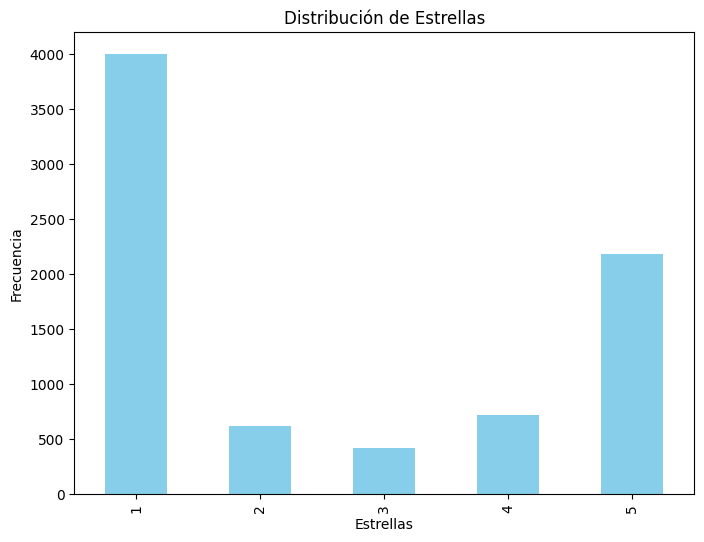

In [81]:
#  Distribución de Estrellas
plt.figure(figsize=(8, 6))
df_review['stars'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribución de Estrellas')
plt.xlabel('Estrellas')
plt.ylabel('Frecuencia')
plt.show()

    La mayoría de las reseñas es de (50.48%) para la estrella  1.
    La segunda calificación más popular es de (27.54%) para la estrella 5.
    Las calificaciones intermedias (estrella 2 con (7.74%), estrella 3 (5.22%) y estrella 4 (9.02%)) tienen una frecuencia menor.



## Tendencias Temporales:

El gráfico muestra la tendencia temporal del número de reseñas por mes para el período comprendido entre 2007 y 2021

C:\Users\Admin\AppData\Local\Temp\ipykernel_134380\4029076373.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_reviews = df_review['date'].value_counts().resample('M').sum()


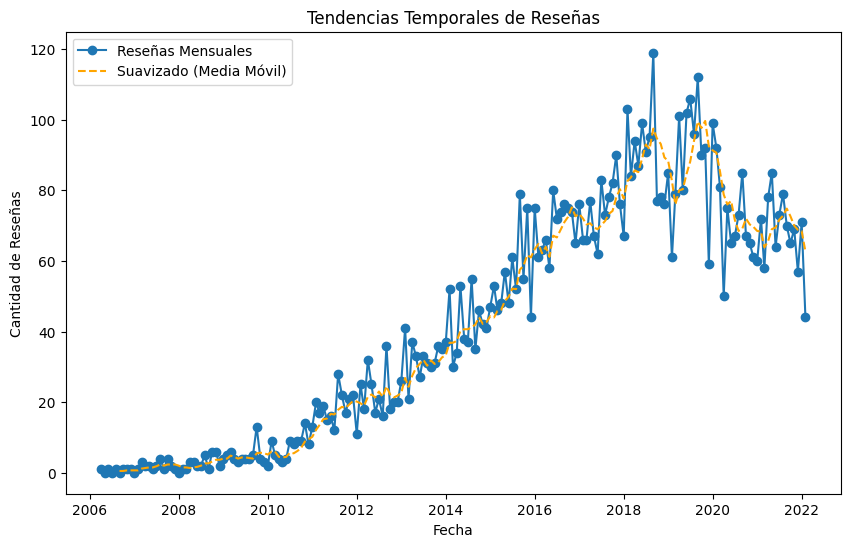

In [82]:
# Tendencias Temporales con Suavizado
plt.figure(figsize=(10, 6))
df_review['date'] = pd.to_datetime(df_review['date'])
monthly_reviews = df_review['date'].value_counts().resample('M').sum()

# Aplicar suavizado con media móvil
smoothed_reviews = monthly_reviews.rolling(window=6).mean()

plt.plot(monthly_reviews, label='Reseñas Mensuales', marker='o')
plt.plot(smoothed_reviews, label='Suavizado (Media Móvil)', color='orange', linestyle='--')

plt.title('Tendencias Temporales de Reseñas')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Reseñas')
plt.legend()
plt.show()


## Correlación entre Estrellas y Variables Adicionales:

Calculamos la correlación entre la calificación de estrellas y otras variables como 'useful', 'funny', o 'cool'. Esto puede indicar si hay alguna relación entre la calificación de estrellas y la utilidad, humor, o frescura percibida de una reseña.

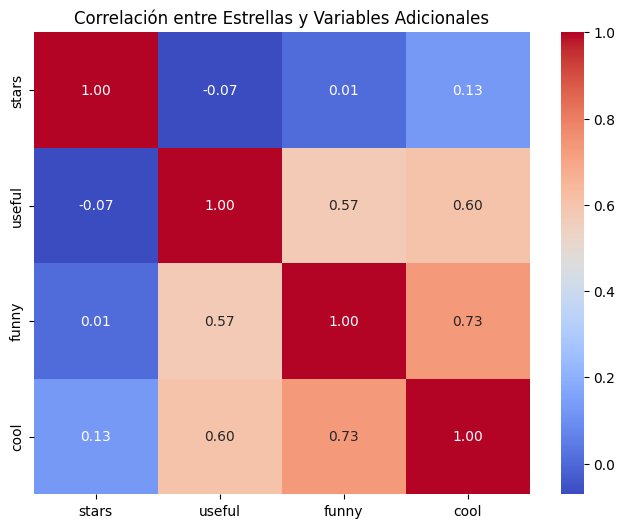

In [83]:
# Relación entre Estrellas y Variables Adicionales
correlation_matrix = df_review[['stars', 'useful', 'funny', 'cool']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre Estrellas y Variables Adicionales')
plt.show()

    Este gráfico de correlación en un conjunto de datos de reseñas muestra que a medida que el número de estrellas aumenta, la utilidad disminuye (correlación negativa, -0.07). Las relaciones entre "stars" y "funny" así como "stars" y "cool" son débiles (0.04 y 0.03 respectivamente). Además, hay correlaciones positivas entre "useful" y "funny" (0.25) y "useful" y "cool" (0.35), indicando que reseñas más útiles tienden a ser más divertidas e interesantes. Por último, "funny" y "cool" tienen correlación negativa (-0.16), sugiriendo que las reseñas más divertidas son menos interesantes. 

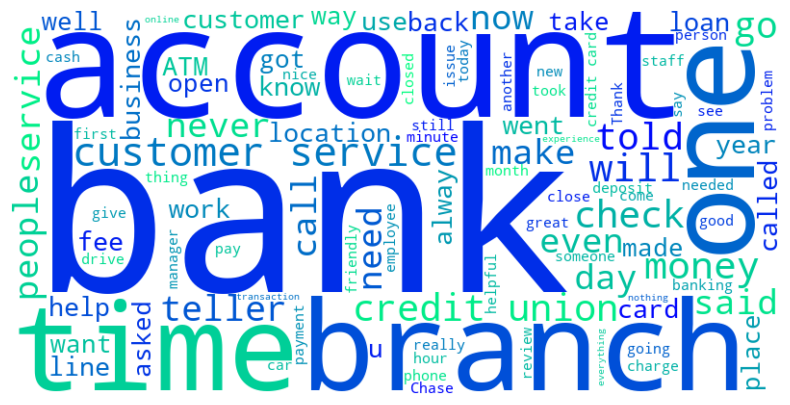

In [84]:
# Concatena todos los textos de la columna 'text' en una sola cadena
all_text = ' '.join(df_review['text'])

# Crear la nube de palabras con la librería wordcloud
wc = WordCloud(background_color="white", max_words=100, width=800, height=400, colormap="winter")
wc.generate(all_text)  # Utiliza 'all_text' en lugar de 'text'

# Mostrar la imagen de la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

    Las palabras más frecuentes se muestran en letras más grandes y las menos frecuentes en letras más pequeñas, ahi podemos ver las palabras que más se repiten en las reseñas.

# Conclusiones del Análisis Exploratorio de Datos (EDA) - Yelp Dataset

* Usuarios y Ciudades más Activos:

Los 10 usuarios más activos están dominados por instituciones financieras como bancos, con Bank of America Financial Center liderando en cantidad de reseñas.
Tucson se destaca como la ciudad con la mayor cantidad de bancos, seguida por Philadelphia y Reno.

* Análisis Temporal:

En 2015, se observa el pico más alto en la incorporación de nuevos usuarios a Yelp.
La cantidad de usuarios activos ha experimentado variaciones a lo largo de los años, con un aumento marcado en 2015 y fluctuaciones posteriores.

* Relaciones Sociales de los Usuarios:

La mayoría de los usuarios de Yelp tienen un número limitado de amigos según la distribución de la cantidad de amigos.
La exploración de correlaciones podría revelar cómo la cantidad de amigos se relaciona con la cantidad de reseñas o la calificación promedio.

* Nube de Palabras en Comentarios (Tips):

Se ha creado una nube de palabras a partir de los comentarios en los tips, lo que proporciona una visión rápida de los términos más frecuentes y destacados en la plataforma.

* Distribución de Review Count y Average Stars:

La distribución de review count y average stars proporciona información sobre la cantidad de reseñas y las calificaciones promedio de los usuarios, respectivamente.

* Distribución de Estrellas:

La mayoría de las reseñas otorgan 1 estrella, seguidas por 5 estrellas. Las calificaciones intermedias tienen una frecuencia menor.

* Tendencias Temporales de Reseñas:

La tendencia temporal de las reseñas muestra una variación a lo largo de los años. Sería útil ajustar la visualización para hacer la tendencia más clara.
* Correlación entre Estrellas y Variables Adicionales:

La correlación indica que a medida que el número de estrellas aumenta, la utilidad disminuye, y las relaciones con 'funny' y 'cool' son débiles. Además, hay correlaciones positivas entre "useful" y "funny", así como "useful" y "cool".

* Check-ins por Hora del Día:

La hora con el mayor número de check-ins es a las 17 hrs, con 2407 actividades, seguida por las 19 hrs  con 2466.
Se observa un mínimo de actividad entre a las 8 hrs con 87 actividades y 9 hrs con 84 actividades check-ins.
    

